# <font color='red'>Project IRIS: with Keras+sklearn</font>

In this tutorial you will discover **how to use Keras+sklearn to develop and evaluate a NN model for a multiclass classification problem**. 

Goals:
* How to load data from CSV and make it available to Keras
* How to prepare multiclass classification data for modeling with NNs
* How to evaluate Keras NN models with scikit-learn

# Description of the input data

The iris flowers dataset is a standard ML dataset, widely used worldwide as benchmark.

### Dataset availability:

Almost ubiquitous.. e.g.
   * [UCI Machine Learning repository](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

More info:
   * [UCI Machine Learning Repository page](https://archive.ics.uci.edu/ml/datasets/Iris).

Alternatively:
   * get it from [https://github.com/bonacor/CorsoSwComp](https://github.com/bonacor/CorsoSwComp) by importing into from Google Colab
      * direct URL to the dataset: [https://github.com/bonacor/CorsoSwComp/blob/master/iris.data.csv](https://github.com/bonacor/CorsoSwComp/blob/master/iris.data.csv)

### Dataset description:

* This is a good example to practice on a multiclass classification problem.
* Each instance describes the properties of an observed iris flower measurements
* All of the 4 input variables are numeric and have the same scale (cm)
   * Sepal length in centimeters 
   * Sepal width in centimeters 
   * Petal length in centimeters 
   * Petal width in centimeters
* The output variable is a specific iris species (3 possibilities)
   * the "class", e.g. "Iris-setosa", "Iris-versicolor" or "Iris-verginica"

### How the dataset looks like:


    5.1,3.5,1.4,0.2,Iris-setosa
    4.9,3.0,1.4,0.2,Iris-setosa
    4.7,3.2,1.3,0.2,Iris-setosa
    4.6,3.1,1.5,0.2,Iris-setosa
    5.0,3.6,1.4,0.2,Iris-setosa
    (...)


### Additional input from best practitioners:

The iris flower dataset is a well studied problem and as such we can expect to achieve a model accuracy in the range of 95% to 97%. USe this as target to aim for when developing your model(s).

# Start-up

## Import Classes and Functions

Start by importing all classes and functions you will need:
* all the functionality we require from **Keras**
* data loading functionalities from **Pandas**
* data preparation and model evaluation from **scikit-learn**
* more as needed (e.g. **numpy**, **matplotlib**, ..)

In [1]:
import numpy
# pandas
from pandas import read_csv
# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


## Initialize random nb generator

Important to ensure that the results we achieve from this model are repeatable, i.e. it ensures that the stochastic process of training a NN model can be reproduced.

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

## Load The Dataset

Download the dataset from the link above and place it in your current working directory, with filename $iris.data.csv$. 

Then, you can quickly inspect it from this same ipynb.

In [3]:
#today, get it from here for example:
!wget https://raw.githubusercontent.com/bonacor/CorsoSwComp/master/iris.data.csv

--2019-05-23 13:34:02--  https://raw.githubusercontent.com/bonacor/CorsoSwComp/master/iris.data.csv
Resolving raw.githubusercontent.com... 151.101.240.133
Connecting to raw.githubusercontent.com|151.101.240.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [text/plain]
Saving to: 'iris.data.csv.18'

iris.data.csv.18    100%[===================>]   4.44K  --.-KB/s    in 0s      

2019-05-23 13:34:02 (19.2 MB/s) - 'iris.data.csv.18' saved [4551/4551]



In [4]:
!ls -trl iris.data.csv

-rw-r--r--  1 bonacor  staff  4551 May 23 11:03 iris.data.csv


In [5]:
!head -5 iris.data.csv

5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


Now, load the dataset. You can do it in various ways. The output variable contains strings, so it is suggested (easiest) to load the data using **pandas** into a DataFrame. While you do so, split the attributes (i.e. columns) into input variables (the matrix of **features X**) and output variables (the vector **label Y**).

In [6]:
# load dataset
dataframe = read_csv("iris.data.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)   # columns from 1st to 4th into X
Y = dataset[:,4]                   # column 5th into Y

Verify what you did.

In [7]:
len(X)

150

In [8]:
len(Y)

150

In [9]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
Y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

# Data preparation/preprocessing

## One-hot encoding the output variable

*(NOTE: different datasets may require different data manipulation/preprocessing. This applies to this specific case)*

When modeling multiclass classification problems using NNs it is practice to reshape the output attribute from a vector that contains values for each class value to a matrix with a boolean for each class value and whether or not a given instance has that class value or not. 

In my case, the output variable contains 3 different class (string) values, i.e. I can have one of each of these 3 observations:

    Iris-setosa
    Iris-versicolor
    Iris-virginica
    
I translate this into a one hot encoded binary matrix for each data instance among these 3:

    Iris-setosa, Iris-versicolor, Iris-virginica


that would hence look as follows:

    1, 0, 0
    0, 1, 0
    0, 0, 1
    
We can do this easily by:
   1. encoding the strings consistently to integers using the scikit-learn class *LabelEncoder*
   2. convert the vector of integers to a one-hot encoding using the Keras function *to_categorical()*

In [11]:
# part 1: encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

Check:

In [12]:
encoder

LabelEncoder()

In [13]:
encoded_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
# part 2: do one-hot encoding
transformed_Y = np_utils.to_categorical(encoded_Y)

In [15]:
transformed_Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

# Define a NN model

## Create a baseline model

You can create a baseline NN - a simple **Fully Connected NN (FCNN)** - for the IRIS multiclass classification problem with just one function:
   * input
       * as per our input dataset, this NN has 4 inputs (X)
   * hidden layer(s)
       * the hidden layer here has 8 nodes, and uses a rectifier (**relu**) activation function, which is a good practice
   * output
       * because we used a one-hot encoding for the dataset, the output layer must create 3 output values, one for each class. We use a **softmax** activation function in the output layer, to ensure the output values are in the range of 0 and 1 and may be used as predicted probabilities: the output value with the largest value will be taken as the class predicted by the model. Finally, the network uses the efficient **adam** GD optimization algorithm with a **logarithmic loss function**, which is called **categorical crossentropy** in Keras.   
   
Hence, the network topology of this simple 1-layer FCNN can be summarized as:

    4 inputs -> 1 hidden layer with 8 nodes -> 3 outputs

and it simplementation in Keras is as simple as follows:

In [16]:
# create model
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
###
#baseline_model()
###
#my_model = baseline_model()
#0 history=model.fit(X, Y, epochs=10)
#1 
history=model.fit(X, transformed_Y, epochs=10)
#2 history=model.fit(X, transformed_Y, epochs=100)
#3 history=model.fit(X, transformed_Y, epochs=1000)
#4 history=model.fit(X, transformed_Y, epochs=100, batch_size=32)
#5 history=model.fit(X, transformed_Y, epochs=100, batch_size=10)

Epoch 1/10
150/150 [==============================] - 0s - loss: 1.2669 - acc: 0.3333     
Epoch 2/10
150/150 [==============================] - 0s - loss: 1.2421 - acc: 0.3333     
Epoch 3/10
150/150 [==============================] - 0s - loss: 1.2163 - acc: 0.3333     
Epoch 4/10
150/150 [==============================] - 0s - loss: 1.1940 - acc: 0.3333     
Epoch 5/10
150/150 [==============================] - 0s - loss: 1.1703 - acc: 0.3400     
Epoch 6/10
150/150 [==============================] - 0s - loss: 1.1435 - acc: 0.3867     
Epoch 7/10
150/150 [==============================] - 0s - loss: 1.1202 - acc: 0.4267     
Epoch 8/10
150/150 [==============================] - 0s - loss: 1.0980 - acc: 0.5333     
Epoch 9/10
150/150 [==============================] - 0s - loss: 1.0782 - acc: 0.6200     
Epoch 10/10
150/150 [==============================] - 0s - loss: 1.0615 - acc: 0.6467     


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


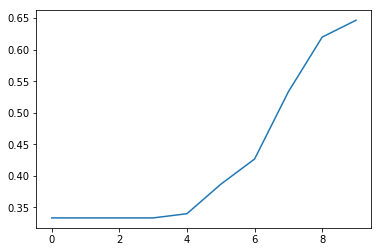

In [18]:
my_variable=history.history["acc"]
plt.plot(range(len(my_variable)),my_variable)

## Train-Test splitting

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, transformed_Y, test_size=0.2, random_state=seed)

In [20]:
# create model
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
###
#baseline_model()
###
#my_model = baseline_model()
#0 history=model.fit(X_train, Y_train, epochs=10, validation_data=(X_test,Y_test))
#1 
history=model.fit(X_train, Y_train, epochs=10, validation_data=(X_test,Y_test))
#2 history=model.fit(X_train, Y_train, epochs=100, validation_data=(X_test,Y_test))
#3 history=model.fit(X_train, Y_train, epochs=1000, validation_data=(X_test,Y_test))
#4 history=model.fit(X_train, Y_train, epochs=100, validation_data=(X_test,Y_test), batch_size=32)
#5 history=model.fit(X_train, Y_train, epochs=100, validation_data=(X_test,Y_test), batch_size=10)

Train on 120 samples, validate on 30 samples
Epoch 1/10
120/120 [==============================] - 0s - loss: 3.5780 - acc: 0.3167 - val_loss: 3.4199 - val_acc: 0.4000
Epoch 2/10
120/120 [==============================] - 0s - loss: 3.4816 - acc: 0.3167 - val_loss: 3.3391 - val_acc: 0.4000
Epoch 3/10
120/120 [==============================] - 0s - loss: 3.3902 - acc: 0.3167 - val_loss: 3.2606 - val_acc: 0.4000
Epoch 4/10
120/120 [==============================] - 0s - loss: 3.3040 - acc: 0.3167 - val_loss: 3.1839 - val_acc: 0.4000
Epoch 5/10
120/120 [==============================] - 0s - loss: 3.2232 - acc: 0.3167 - val_loss: 3.1097 - val_acc: 0.4000
Epoch 6/10
120/120 [==============================] - 0s - loss: 3.1382 - acc: 0.3167 - val_loss: 3.0390 - val_acc: 0.4000
Epoch 7/10
120/120 [==============================] - 0s - loss: 3.0600 - acc: 0.3167 - val_loss: 2.9708 - val_acc: 0.4000
Epoch 8/10
120/120 [==============================] - 0s - loss: 2.9855 - acc: 0.3167 - val_lo

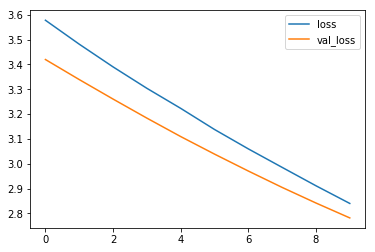

In [21]:
variable1=history.history["loss"]
variable2=history.history["val_loss"]
plt.plot(range(len(variable1)),variable1, label='loss')
plt.plot(range(len(variable2)),variable2, label='val_loss')
plt.legend()

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


# Exercise 1 (difficulty: easy)

Repeat the same using only the last 100 entries of the dataset.
   * Are you able to understand how the problem is modified by this choice, and which code changes are necessary to make this notebook work still?
   * Are you able to interpret the results you get?

# Exercise 2 (difficulty: moderate)

## Use KerasClassifier


The idea here is to use the Keras library which provides wrapper classes to allow you to use NN models developed with Keras (see cell above) in scikit-learn. Why so? Because Keras is simple, and scikit-learn is powerful and versatile!

There is a *KerasClassifier* class in Keras that can be used as an *Estimator* in scikit-learn, the base type of model in the library. We need to actually create our KerasClassifier first, to be used in scikit-learn. KerasClassifier takes the name of a function (the one we wrote above) as an argument, plus arguments that will be passed on to the *fit()* function internally used to train the NN. Here, we pass:

* a number of epochs as 200
* a batch size as 5 

to use when training the model. Debugging is also turned off when training by setting verbose to 0.
    
This function returns the constructed NN model, ready for training.

Hint: https://keras.io/scikit-learn-api/

In [28]:
## INSERT YOUR CODE HERE

# insert here a new function named baseline_model that creates the model 
# used in the notebook above, and just returns it as output.

In [29]:
## INSERT YOUR CODE HERE

# create an "estimator" object that works as a KerasClassifier with the parameters suggested above


## Evaluate The Model with $k$-Fold Cross-Validation

It is time to evaluate our NN model on our training data, a.k.a. the "training" phase.

The scikit-learn library has excellent capability to evaluate models using a suite of techniques. The gold standard for evaluating ML models is **k-fold cross-validation (k-fold CV)**. We do as follows:

1. we define the model evaluation procedure.
      * here, we shuffle the data before partitioning it, and we set the number of folds to 10 (a good default)
     
     
2. we evaluate our model (*estimator*) on our dataset (*X* and *transformed_Y*) using a 10-fold CV procedure (kfold)

Evaluating the model only takes approximately 10 seconds and returns an object that describes the evaluation of the k=10 constructed models for each of the splits of the dataset. 

The results are summarized as both the mean and standard deviation of the model accuracy on the dataset.

In [30]:
# part 1
## INSERT YOUR CODE HERE

# create a "kfold" object (hint: search for scikit-learn KFold in the documentation)

In [32]:
# part 2
## INSERT YOUR CODE HERE

# create an object "results" by using "cross_val_score" in scikit-learn 
# and print printout mean and std dev of the accuracy.

This is a reasonable estimation of the performance of the model on unseen data. It is also within the realm of known top results for this problem.

# Summary 

What we learned:

* how to develop and evaluate a NN using the Keras library for ML/DL.

Specifically:

* How to load data and make it available to Keras
* How to prepare multiclass classification data for modeling using one hot encoding
* How to use Keras NN models with scikit-learn
* How to define a NN using Keras for multiclass classification
* How to evaluate a Keras NN model using scikit-learn with k-fold cross-validation